NBA All Star Prediction Project

Matt Behrens

I decided that I would do something related to basketball stats as that is something I am passionate about. I found a number of different NBA related projects but never found one where they were predicting all stars so thats what I decided to do. The goal of this project was to try and predict who all the best players in the league will be, otherwise known as the All Stars. I wanted to develope a model that can accuratly predict which players will become an all star based on the season stats. To do this I used Python and many of the popular libraries like Pandas, Sklearn, Matplotlib and Seaborn. To do this I used a few different models but soon learned that random forest was the most accurate for the historic data I trained and tested on so that is what I ended up using.

In [1]:
from basketball_reference_web_scraper import client
from basketball_reference_web_scraper.data import Team
import json
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

DATA

I got data from basketball-reference.com using an API I found. The API had a few different end points to collect different types of stats but I decided to go with the advanced player stats. The features that I used from this data was 'age' (number), 'minutes_played' (number), 'player_efficiency_rating' (number), 'true_shooting_percentage' (number), 'three_point_attempt_rate' (number),  'free_throw_attempt_rate' (number), 'offensive_rebound_percentage' (number),  'defensive_rebound_percentage' (number), 'total_rebound_percentage' (number), 'assist_percentage' (number), 'steal_percentage' (number), 'block_percentage' (number), 'turnover_percentage' (number), 'usage_percentage' (number), 'offensive_win_shares', (number) 'defensive_win_shares' (number), 'win_shares' (number), 'win_shares_per_48_minutes' (number), 'offensive_box_plus_minus' (number), 'defensive_box_plus_minus' (number), 'box_plus_minus' (number), 'value_over_replacement_player' (number), 'all star' (boolean). That makes a total of around 20 features. There were also some identifier fields that I dropped for the training but used to identify players such as name, team and position. I created a dataframe using all the data from the 2014 season up until the current date. I had to add a column for if they were an allstar that season (boolean). I did this manually as I couldnt find a data source for this on basketball-reference. 

In [2]:
# USED TO PRINT MESSAGES WHEN TESTING
debug = 0

In [3]:
# STATS FOR 2014-15 SEASON
stats_1415 = client.players_advanced_season_totals(season_end_year=2015)
box_1415 = pd.DataFrame()
box_1415 = box_1415.append(stats_1415, ignore_index=True) 
box_1415['year'] = '2014-15'
if debug:
    print(box_1415.head())

In [4]:
# STATS FOR 2015-16 SEASON
stats_1516 = client.players_advanced_season_totals(season_end_year=2016)
box_1516 = pd.DataFrame()
box_1516 = box_1516.append(stats_1516, ignore_index=True) 
box_1516['year'] = '2015-16'
if debug:
    print(box_1516.head())

In [5]:
# STATS FOR 2016-17 SEASON
stats_1617 = client.players_advanced_season_totals(season_end_year=2017)
box_1617 = pd.DataFrame()
box_1617 = box_1617.append(stats_1617, ignore_index=True) 
box_1617['year'] = '2016-17'
if debug:
    print(box_1617.head())

In [6]:
# STATS FOR 2017-18 SEASON
stats_1718 = client.players_advanced_season_totals(season_end_year=2018)
box_1718 = pd.DataFrame()
box_1718 = box_1718.append(stats_1718, ignore_index=True) 
box_1718['year'] = '2017-18'
if debug:
    print(box_1718.head())

In [7]:
# STATS FOR 2018-19 SEASON
stats_1819 = client.players_advanced_season_totals(season_end_year=2019)
box_1819 = pd.DataFrame()
box_1819 = box_1819.append(stats_1819, ignore_index=True) 
box_1819['year'] = '2018-19'
if debug:
    print(box_1819.head())

In [8]:
# STATS FOR 2019-20 SEASON
stats_1920 = client.players_advanced_season_totals(season_end_year=2020)
box_1920 = pd.DataFrame()
box_1920 = box_1920.append(stats_1920, ignore_index=True) 
box_1920['year'] = '2019-20'
if debug:
    print(box_1920.head())

In [9]:
# Checking the size of the dataframe for each season
print(box_1415.shape)
print(box_1516.shape)
print(box_1617.shape)
print(box_1718.shape)
print(box_1819.shape)
print(box_1920.shape)

(575, 28)
(528, 28)
(542, 28)
(605, 28)
(622, 28)
(570, 28)


In [10]:
# PUT IN ALL STAR DATA MANUALLY
# All Star column = 1 if it is an allstar
def all_star1415(df):
    if df['name'] == 'John Wall' or df['name'] == 'Kyle Lowry'  or df['name'] == 'LeBron James' or df['name'] == 'Pau Gasol' or df['name'] == 'Carmelo Anthony' or df['name'] == 'Al Horford' or df['name'] == 'Chris Bosh' or df['name'] == 'Paul Millsap' or df['name'] == 'Jimmy Butler' or df['name'] == 'Dwayne Wade' or df['name'] == 'Jeff Teague' or df['name'] == 'Kyrie Irving' or df['name'] == 'Kyle Korver' or df['name'] == 'Stephen Curry' or df['name'] == 'Kobe Bryant' or df['name'] == 'Anthony Davis' or df['name'] == 'Marc Gasol' or df['name'] == 'Blake Griffin' or df['name'] == 'LaMarcus Aldridge' or df['name'] == 'Tim Duncan' or df['name'] == 'Kevin Durant' or df['name'] == 'Klay Thompson' or df['name'] == 'Russell Westbrook' or df['name'] == 'James Harder' or df['name'] == 'Chris Paul' or df['name'] == 'DeMarcus Cousins' or df['name'] == 'Damian Lillard' or df['name'] == 'Dirk Nowitzki':
        val = 1
    else:
        val = 0
    return val

def all_star1516(df):
    if df['name'] == 'Dwyane Wade' or df['name'] == 'Kyle Lowry' or df['name'] == 'LeBron James' or df['name'] == 'Paul George' or df['name'] == 'Carmelo Anthony' or df['name'] == 'Jimmy Butler' or df['name'] == 'Chris Bosh' or df['name'] == 'John Wall' or df['name'] == 'Paul Millsap' or df['name'] == 'DeMar DeRozan' or df['name'] == 'Andre Drummond' or df['name'] == 'Isaiah Thomas' or df['name'] == 'Pau Gasol' or df['name'] == 'Al Horford' or df['name'] == 'Stephen Curry' or df['name'] == 'Russell Westbrook' or df['name'] == 'Kobe Bryant' or df['name'] == 'Kevin Durant' or df['name'] == 'Kawhi Leonard' or df['name'] == 'Chris Paul' or df['name'] == 'LaMarcus Aldrige' or df['name'] == 'James Harder' or df['name'] == 'Anthony Davis' or df['name'] == 'DeMarcus Cousins' or df['name'] == 'Klay Thompson' or df['name'] == 'Draymond Green':
        val = 1
    else:
        val = 0
    return val

def all_star1617(df):
    if df['name'] == 'Kyrie Irving' or df['name'] == 'DeMar DeRozen' or df['name'] == 'LeBron James' or df['name'] == 'Jimmy Butler' or df['name'] == 'Giannis Antetokounmpo' or df['name'] == 'Isaiah Thomas' or df['name'] == 'John Wall' or df['name'] == 'Kevin Love' or df['name'] == 'Carmelo Anthony' or df['name'] == 'Kyle Lowry' or df['name'] == 'Paul George' or df['name'] == 'Kemba Walker' or df['name'] == 'Paul Millsap' or df['name'] == 'Stephen Curry' or df['name'] == 'James Harden' or df['name'] == 'Kevin Durant' or df['name'] == 'Kawhi Leonard' or df['name'] == 'Anthony Davis' or df['name'] == 'Russell Westbrook' or df['name'] == 'Klay Thompson' or df['name'] == 'Draymond Green' or df['name'] == 'DeMarcus Cousins' or df['name'] == 'Marc Gasol' or df['name'] == 'DeAndre Jordan' or df['name'] == 'Gordon Hayward':
        val = 1
    else:
        val = 0
    return val

def all_star1718(df):
    if df['name'] == 'Kyrie Irving' or df['name'] == 'DeMar DeRozan' or df['name'] == 'LeBron James' or df['name'] == 'Joel Embiid' or df['name'] == 'Giannis Antetokounmpo' or df['name'] == 'Bradley Beal' or df['name'] == 'Goran Dragić' or df['name'] == 'Al Horford' or df['name'] == 'Kevin Love' or df['name'] == 'Kyle Lowry' or df['name'] == 'Victor Oladipo' or df['name'] == 'John Wall' or df['name'] == 'Andre Drummond' or df['name'] == 'Kemba Walker' or df['name'] == 'Stephen Curry' or df['name'] == 'James Harden' or df['name'] == 'Kevin Durant' or df['name'] == 'DeMarcus Cousins' or df['name'] == 'Anthony Davis' or df['name'] == 'Russell Westbrook' or df['name'] == 'Damian Lillard' or df['name'] == 'Draymond Green' or df['name'] == 'Karl-Anthony Towns' or df['name'] == 'LaMarcus Aldridge' or df['name'] == 'Klay Thompson' or df['name'] == 'Jimmy Butler' or df['name'] == 'Paul George' or df['name'] == 'Kristaps Porziņģis':
        val = 1
    else:
        val = 0
    return val

def all_star1819(df):
    if df['name'] == 'LeBron James' or df['name'] == 'James Harden' or df['name'] == 'Kevin Durant' or df['name'] == 'Kyrie Irving' or df['name'] == 'Kawhi Lenoard' or df['name'] == 'Bradley Beal' or df['name'] == 'Anthony Davis' or df['name'] == 'Ben Simmons' or df['name'] == 'Damian Lillard' or df['name'] == 'Dwayne Wade' or df['name'] == 'Karl-Anthony Towns' or df['name'] == 'Klay Thompson' or df['name'] == 'LaMarcus Aldridge' or df['name'] == 'Russell Westbrook' or df['name'] == 'Victor Oladip' or df['name'] == 'Nikola Vucevic' or df['name'] == 'Nikola Jokic' or df['name'] == 'Kyle Lowry' or df['name'] == 'Khris Middleton' or df['name'] == 'Dirk Nowitzki' or df['name'] == "D'Angelo Russell" or df['name'] == 'Blake Griffin' or df['name'] == 'Kemba Walker' or df['name'] == 'Paul George' or df['name'] == 'Joel Embiid' or df['name'] == 'Stephen Curry' or df['name'] == 'Giannis Antetokounmpo':
        val = 1
    else:
        val = 0
    return val

def all_star1920(df):
    return 0


In [11]:
# PUT IN ALL STAR DATA INTO THE DATAFRAMES BASED ON YEAR
box_1415['AllStar'] = box_1415.apply(all_star1415, axis=1)
box_1516['AllStar'] = box_1516.apply(all_star1516, axis=1)
box_1617['AllStar'] = box_1617.apply(all_star1617, axis=1)
box_1718['AllStar'] = box_1718.apply(all_star1718, axis=1)
box_1819['AllStar'] = box_1819.apply(all_star1819, axis=1)
box_1920['AllStar'] = box_1920.apply(all_star1920, axis=1)

In [12]:
# COMPILE ALL PREVIOUS YEARS AS TEST DATA
# Left out 2019-2020 to predict who will be an all star this season!
test_stats = pd.DataFrame()
test_stats = test_stats.append(box_1415, ignore_index = True)
test_stats = test_stats.append(box_1516, ignore_index = True)
test_stats = test_stats.append(box_1617, ignore_index = True)
test_stats = test_stats.append(box_1718, ignore_index = True)
test_stats = test_stats.append(box_1819, ignore_index = True)

In [13]:
# Check of the columns and statistics that are in the dataframe
test_stats.columns

Index(['slug', 'name', 'positions', 'age', 'team', 'games_played',
       'minutes_played', 'player_efficiency_rating',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_percentage', 'total_rebound_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover_percentage', 'usage_percentage', 'offensive_win_shares',
       'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes',
       'offensive_box_plus_minus', 'defensive_box_plus_minus',
       'box_plus_minus', 'value_over_replacement_player', 'year', 'AllStar'],
      dtype='object')

In [14]:
# CHECK TO MAKE SURE THE DATA IS FORMATTED CORRECTLY
test_stats.head()

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,year,AllStar
0,acyqu01,Quincy Acy,[Position.POWER_FORWARD],24,Team.NEW_YORK_KNICKS,68,1287,11.9,0.533,0.181,...,1.0,0.7,1.7,0.063,-2.1,-1.0,-3.1,-0.3,2014-15,0
1,adamsjo01,Jordan Adams,[Position.SHOOTING_GUARD],20,Team.MEMPHIS_GRIZZLIES,30,248,12.8,0.489,0.291,...,0.0,0.4,0.4,0.073,-1.2,2.6,1.4,0.2,2014-15,0
2,adamsst01,Steven Adams,[Position.CENTER],21,Team.OKLAHOMA_CITY_THUNDER,70,1771,14.1,0.549,0.005,...,1.9,2.2,4.1,0.111,-1.5,0.2,-1.3,0.3,2014-15,0
3,adrieje01,Jeff Adrien,[Position.POWER_FORWARD],28,Team.MINNESOTA_TIMBERWOLVES,17,215,14.2,0.494,0.000,...,0.2,0.2,0.4,0.087,-1.9,-0.6,-2.4,0.0,2014-15,0
4,afflaar01,Arron Afflalo,[Position.SHOOTING_GUARD],29,Team.DENVER_NUGGETS,53,1750,11.7,0.533,0.370,...,1.4,0.4,1.8,0.050,-0.7,-1.2,-1.9,0.1,2014-15,0


In [15]:
# CHECK TO VERIFY THAT THE ALLSTARS ARE ACTUALLY ALLSTARS
test_stats[test_stats['AllStar'] == 1].head()

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,year,AllStar
9,aldrila01,LaMarcus Aldridge,[Position.POWER_FORWARD],29,Team.PORTLAND_TRAIL_BLAZERS,71,2512,22.8,0.528,0.074,...,4.9,3.7,8.6,0.165,3.2,-0.3,2.9,3.1,2014-15,1
20,anthoca01,Carmelo Anthony,[Position.SMALL_FORWARD],30,Team.NEW_YORK_KNICKS,40,1428,21.5,0.531,0.222,...,2.2,0.6,2.9,0.097,4.9,-1.9,3.0,1.8,2014-15,1
63,boshch01,Chris Bosh,[Position.CENTER],30,Team.MIAMI_HEAT,44,1556,19.8,0.548,0.226,...,2.1,1.5,3.6,0.111,2.5,-1.3,1.3,1.3,2014-15,1
73,bryanko01,Kobe Bryant,[Position.SHOOTING_GUARD],36,Team.LOS_ANGELES_LAKERS,35,1207,17.6,0.477,0.258,...,-0.4,0.6,0.2,0.006,2.0,-1.7,0.3,0.7,2014-15,1
80,butleji01,Jimmy Butler,[Position.SHOOTING_GUARD],25,Team.CHICAGO_BULLS,65,2513,21.3,0.583,0.212,...,8.2,3.0,11.2,0.214,3.4,1.2,4.6,4.2,2014-15,1


In [16]:
# MAKE SURE THAT THERE ARE NO ALLSTARS IN THE CURRENT SEASON YET
box_1920[box_1920['AllStar'] == 1].head()

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,year,AllStar


In [17]:
# DROP COLUMNS THAT ARENT USEFUL TO THE FEATURE SET
# games played was a problem when determining the current season as there has only been around 1/5 of the games played and it was a relatively important feature
drop = ['slug', 'name', 'positions', 'team', 'year', 'AllStar', 'games_played']
# FEATURES FOR ALL THE TRAINING DATA FROM 2014-2019
features = test_stats.drop(columns = drop).columns
# FEATURES FOR THE CURRENT 2020 SEASON
features_2020 = box_1920.drop(columns = drop).columns

In [18]:
# FEATURES TO BE USED FOR THE MODEL
print(features)

Index(['age', 'minutes_played', 'player_efficiency_rating',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_percentage', 'total_rebound_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover_percentage', 'usage_percentage', 'offensive_win_shares',
       'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes',
       'offensive_box_plus_minus', 'defensive_box_plus_minus',
       'box_plus_minus', 'value_over_replacement_player'],
      dtype='object')


In [19]:
# SETS feature_stats EQUAL TO THE FEATURES IN THE PREVIOUS STEP
# SETS Y EQUAL TO THE BOOLEAN OF WHETHER OR NOT A PLAYER WAS AN ALLSTAR IN THE GIVEN YEAR
features_stats = test_stats[features]
y = test_stats['AllStar']

In [20]:
# SETS X2020 TO THE FEATURES OF THE 2020 SEASON to predict the outcome of the season
X2020 = box_1920[features_2020]

Models

I used a few different models when testing but random forrest produces the best results so that is what I stuck with. I split the data into test and train using train_test_split and then fit the model using the split of the training data. I chose not to do a max depth and set the n_estimators to 75 when training. Then I tested the training and testing accuracy. I got a testing accuracy of 97.63% which I was satisfied with.

In [21]:
# SPLIT INTO TESTING AND TRAINNING DATA SETS FOR THE SEASONS BETWEEN 2014 AND 2019
# RANDOM STATE IS SET TO 1 TO INSURE ITS THE SAME EVERY RUN
train_x, test_x, train_y, test_y = train_test_split(features_stats, y, random_state=1, stratify = y)

In [22]:
# CREATING A RANDOM FOREST MODEL
randomforest = RandomForestClassifier(max_depth = None, random_state = 1, n_estimators = 75)

In [23]:
# FIT THE MODEL WITH THE TRAINING DATA USING RANDOM FOREST
randomforest.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [24]:
# TRAINING SCORE
train_score = randomforest.score(train_x, train_y)
print("Training Score = " + str(train_score))

Training Score = 1.0


In [25]:
# TEST SCORE
test_score = randomforest.score(test_x, test_y)
print("Test Score = " + str(test_score))

Test Score = 0.9763231197771588


In [26]:
# PREDICT THE PROBABILITY OF THE PLAYERS MAKING AN ALLSTAR TEAM
# DETERMINES FOR ALL 3 DATA PARTS
train_x['probability'] = randomforest.predict_proba(train_x)[:, 1]
test_x['probability'] = randomforest.predict_proba(test_x)[:, 1]
X2020['probability'] = randomforest.predict_proba(X2020)[:, 1]

/Users/mattbehrens/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mattbehrens/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mattbehrens/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a 

In [27]:
# SET THE ALLSTAR BOOLEAN EQUAL TO THE CORRECT VALUE
train_x['AllStar'] = train_y
test_x['AllStar'] = test_y

/Users/mattbehrens/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mattbehrens/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# COMBINE THE TRAIN AND TEST DATA FOR VISUALIZATION AS WELL AS DETERMINING WHICH PLAYERS HAVE THE HIGHEST PROBABILITY
train = pd.concat([train_x, test_x])
# ADD THE PLAYERS NAME IN AS WELL AS WHAT SEASON THE STATS ARE FROM IF A PLAYER HAS PLAYED MULTIPLE SEASONS
train['name'] = test_stats['name']
train['year'] = test_stats['year']
# SET THE INDEX OF THE DATA FRAME TO THE NAME AND THE YEAR
train = train.set_index(['name', 'year'])

The table below is all the historic data sorted by probability of a player becoming an all star. Looking at this table it is very accurate as the top 2 players James Harden (2018-19) and LeBron James (2015-16) were both all stars by a substantial margin eventually winning the MVP award at the end of the season. 

In [29]:
# SHOW THE TOP PROBIBILITY OF HISTORIC SEASONS AND PLAYERS MAKING THE ALL STAR TEAM
train.sort_values(by = 'probability', ascending = False).head(50)

,,age,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,assist_percentage,...,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,probability,AllStar
name,year,,,,,,,,,,,,,,,,,,,,,
James Harden,2018-19,29,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,...,11.4,3.8,15.2,0.254,9.4,1.6,11.0,9.3,1.000000,1
LeBron James,2015-16,31,2709,27.5,0.588,0.199,0.347,4.7,18.8,11.8,36.0,...,9.6,4.0,13.6,0.242,7.0,2.0,9.0,7.5,1.000000,1
LaMarcus Aldridge,2017-18,32,2509,25.0,0.570,0.068,0.296,10.8,17.3,14.0,11.3,...,7.4,3.5,10.9,0.209,4.3,-0.4,3.9,3.7,0.986667,1
Kevin Durant,2017-18,29,2325,26.0,0.640,0.338,0.331,1.6,19.5,11.2,25.5,...,7.5,2.9,10.4,0.215,6.7,0.6,7.3,5.5,0.986667,1
Marc Gasol,2014-15,30,2687,21.7,0.558,0.016,0.410,4.9,21.8,13.4,19.7,...,5.5,4.7,10.2,0.182,2.7,2.4,5.1,4.8,0.986667,1
Anthony Davis,2016-17,23,2708,27.5,0.580,0.088,0.424,6.7,27.9,17.2,11.1,...,5.9,5.1,11.0,0.195,4.4,1.4,5.9,5.4,0.986667,1
Kyle Lowry,2015-16,29,2851,22.2,0.578,0.457,0.410,2.2,12.3,7.3,29.9,...,8.0,3.7,11.6,0.196,4.7,1.1,5.8,5.7,0.986667,1
Russell Westbrook,2016-17,28,2802,30.6,0.554,0.300,0.433,5.4,28.8,17.1,57.3,...,8.5,4.6,13.1,0.224,8.7,2.4,11.1,9.3,0.986667,1
Giannis Antetokounmpo,2017-18,23,2756,27.3,0.598,0.100,0.457,6.7,25.3,16.0,23.7,...,8.3,3.6,11.9,0.207,5.3,0.9,6.2,5.7,0.973333,1


For this part I determined the importance of each feature in the dataset. I wanted to know which features were the most important to a player and which stats can make or break an all star run. I concluded that value over replacement is the most important feature, this makes sense as being a more valuable player to the team will lead to improved stats. Other important features were what I excpected being win shares, minutes played and usage percentage. These all conclude the same thing of the more a player is being used and the more effiecent they are the better chance of become an allstar they get. 

In [30]:
# SHOW WHICH FEATURES ARE MOST IMPORTANT
randomforest.feature_importances_
top = pd.DataFrame(randomforest.feature_importances_.reshape(1,22), columns = features).T
top.rename(columns = {0: 'IMPORTANCE'}, inplace = True)
top.sort_values(by = 'IMPORTANCE', ascending = False)

,IMPORTANCE
value_over_replacement_player,0.194441
offensive_win_shares,0.091886
win_shares,0.083526
minutes_played,0.082208
usage_percentage,0.066144
box_plus_minus,0.062702
defensive_win_shares,0.055808
offensive_box_plus_minus,0.055154
player_efficiency_rating,0.053866
assist_percentage,0.030793


A graph of the importance to make it easier to understand.

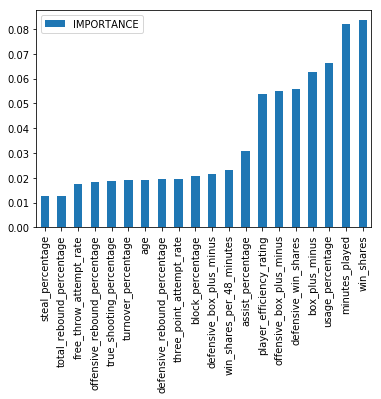

In [33]:
# GRAPH OF WHICH FEATURES ARE MOST IMPORTANT 
top.sort_values(by = 'IMPORTANCE').head(20).plot(kind = 'bar')

The Graphs below show the most imporatnat features vs the all star probability of a player. The orange dots represent a player being an all star and the blue dots represent someone who didn't make the all star team. I did this for Usage Percentage, Plus Minus, Minutes Played and value over replacement. There are significantly more outliers than I would have initially thought. 

<function matplotlib.pyplot.show(*args, **kw)>

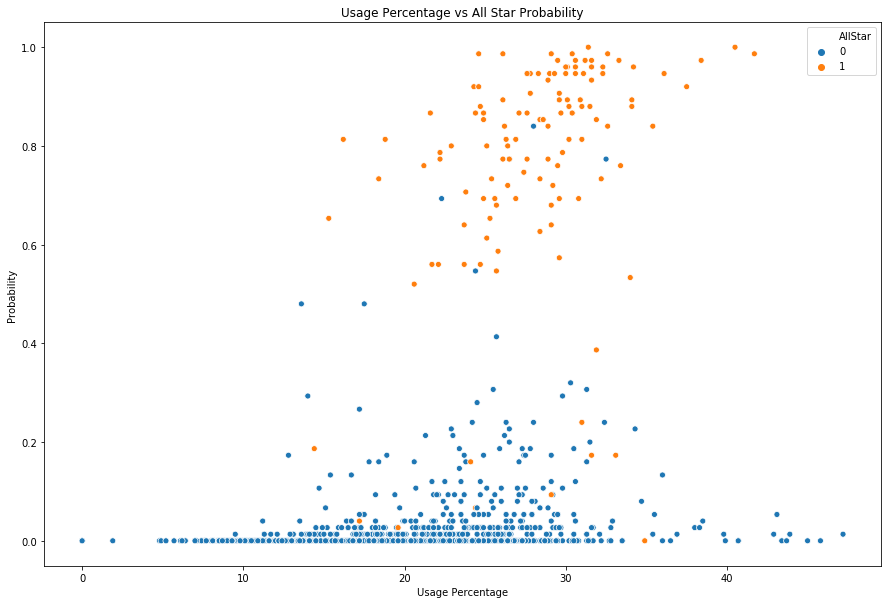

In [34]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'usage_percentage', y = 'probability', data = train, hue = 'AllStar')
plt.xlabel('Usage Percentage')
plt.ylabel('Probability')
plt.title('Usage Percentage vs All Star Probability')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

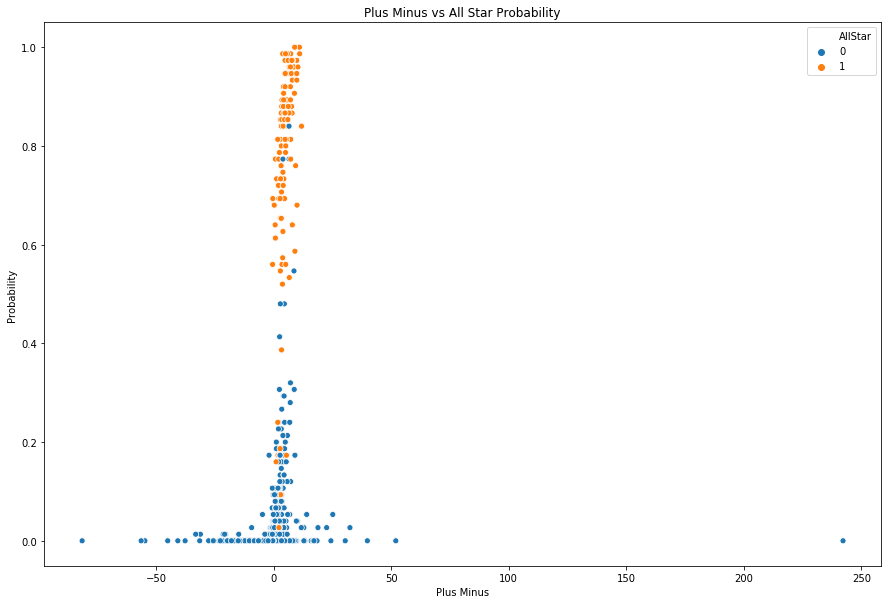

In [35]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'box_plus_minus', y = 'probability', data = train, hue = 'AllStar')
plt.xlabel('Plus Minus')
plt.ylabel('Probability')
plt.title('Plus Minus vs All Star Probability')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

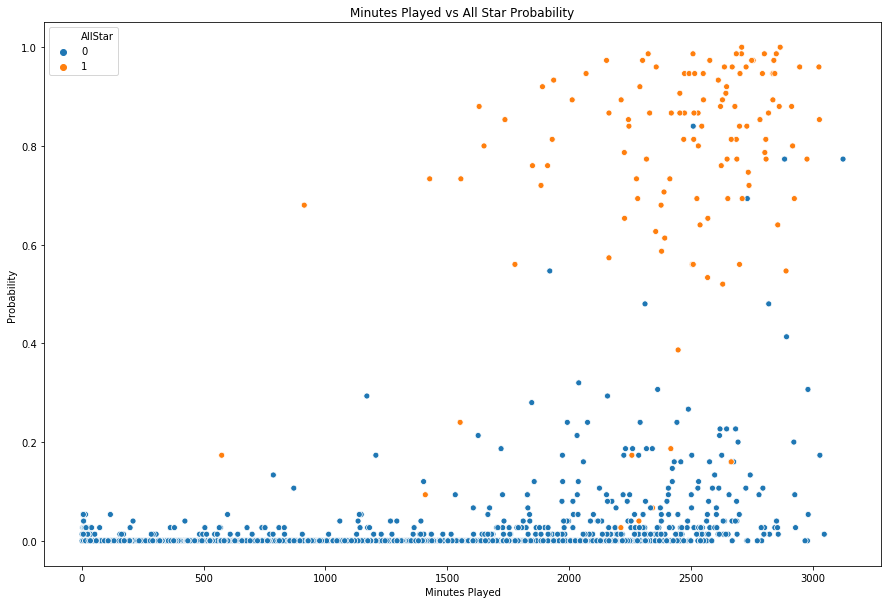

In [36]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'minutes_played', y = 'probability', data = train, hue = 'AllStar')
plt.xlabel('Minutes Played')
plt.ylabel('Probability')
plt.title('Minutes Played vs All Star Probability')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

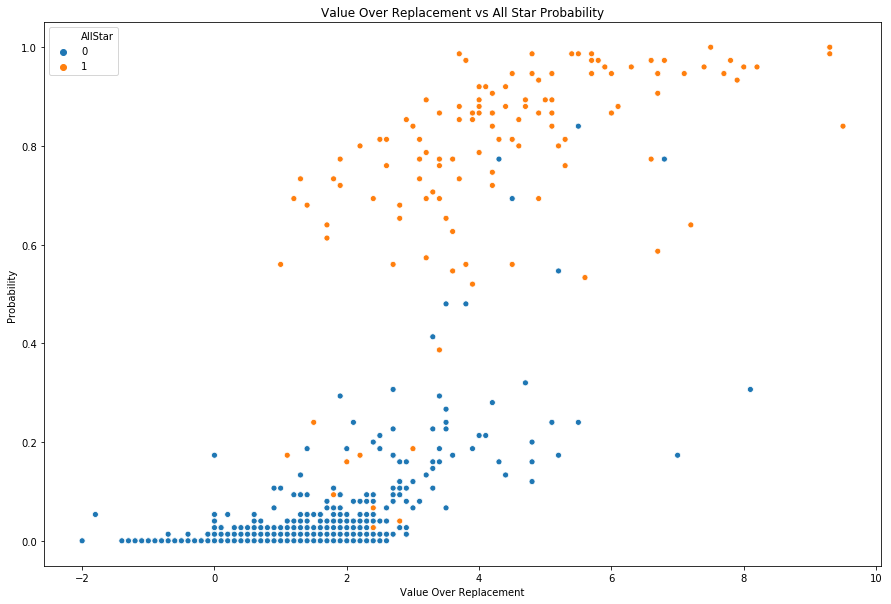

In [37]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'value_over_replacement_player', y = 'probability', data = train, hue = 'AllStar')
plt.xlabel('Value Over Replacement')
plt.ylabel('Probability')
plt.title('Value Over Replacement vs All Star Probability')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

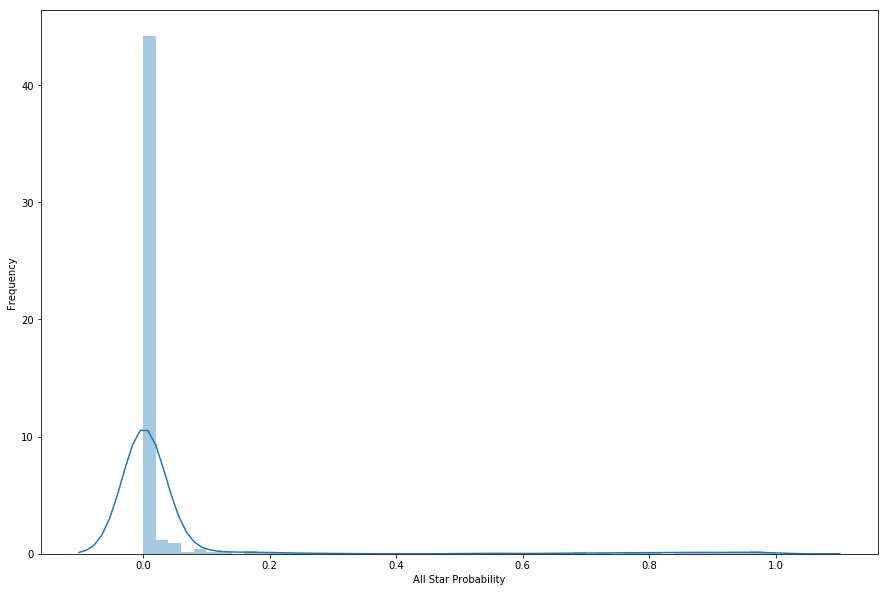

In [38]:
plt.figure(figsize = (15,10))
sns.distplot(train['probability'])
plt.xlabel('All Star Probability')
plt.ylabel('Frequency')
plt.show

This is a comparason of the averages based on if they made an allstar team or not. This shows what a player should have to average to have a chance of making the all star team. 

In [39]:
# COMPARE PLAYER AVERAGES OF WHO MADE AND WHO DIDNT MAKE THE ALL STAR TEAM
# 0 = NO ALL STAR
# 1 = ALL STAR
averages = train.groupby('AllStar').mean().T
print(averages)

AllStar                                 0            1
age                             26.301674    27.588710
minutes_played                 972.423581  2423.935484
player_efficiency_rating        12.399491    22.782258
true_shooting_percentage         0.518259     0.577161
three_point_attempt_rate         0.322848     0.289798
free_throw_attempt_rate          0.259600     0.344403
offensive_rebound_percentage     4.973435     4.471774
defensive_rebound_percentage    14.762045    18.422581
total_rebound_percentage         9.862627    11.545968
assist_percentage               12.522016    25.023387
steal_percentage                 1.540830     1.863710
block_percentage                 1.591921     2.024194
turnover_percentage             12.843777    12.303226
usage_percentage                18.227329    28.105645
offensive_win_shares             0.913137     5.942742
defensive_win_shares             0.952111     3.211290
win_shares                       1.866667     9.154032
win_shares

Here are the results of the 2020 all star predictions sorted by probablilty to be an all star. 

In [40]:
# PREDICTING WHO WILL MAKE THE ALL STAR TEAM THIS YEAR
# TOP 50 PLAYERS BASED ON PROBABILITY
X2020['name'] = box_1920['name']
X2020['year'] = box_1920['year']
X2020 = X2020.set_index(['name', 'year'])
X2020.sort_values(by = 'probability', ascending = False).head(50)

/Users/mattbehrens/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mattbehrens/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,,age,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,assist_percentage,...,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,probability
name,year,,,,,,,,,,,,,,,,,,,,,
James Harden,2019-20,30,2241,28.4,0.616,0.555,0.519,3.0,15.3,9.1,34.4,...,36.4,8.7,2.7,11.5,0.245,7.9,1.2,9.0,6.3,0.933333
LeBron James,2019-20,35,2094,26.0,0.582,0.324,0.292,3.1,21.0,12.3,49.7,...,31.6,6.1,3.4,9.5,0.218,6.8,1.9,8.7,5.7,0.826667
Giannis Antetokounmpo,2019-20,25,1763,31.6,0.608,0.238,0.500,7.8,34.5,22.0,33.9,...,37.4,5.6,4.8,10.4,0.282,7.4,4.1,11.5,6.0,0.800000
Anthony Davis,2019-20,26,1889,28.2,0.614,0.195,0.460,7.3,22.1,14.9,14.6,...,29.7,6.2,4.1,10.3,0.262,5.8,2.8,8.5,5.0,0.760000
Kawhi Leonard,2019-20,28,1643,26.7,0.585,0.287,0.344,3.3,19.7,11.7,27.0,...,33.2,4.6,3.0,7.6,0.222,6.5,2.5,9.0,4.6,0.733333
Luka Dončić,2019-20,20,1799,27.7,0.584,0.442,0.442,4.1,24.7,14.6,45.3,...,37.0,5.8,2.3,8.1,0.215,7.3,1.1,8.4,4.7,0.626667
Jimmy Butler,2019-20,30,1851,23.4,0.583,0.162,0.679,6.2,15.2,10.9,28.1,...,25.2,6.0,2.5,8.5,0.219,4.0,1.3,5.2,3.4,0.493333
Jayson Tatum,2019-20,21,2043,20.3,0.562,0.377,0.251,3.0,18.8,11.0,14.0,...,28.6,2.9,3.4,6.2,0.147,3.3,0.6,3.9,3.0,0.493333
Damian Lillard,2019-20,29,2140,26.2,0.619,0.493,0.377,1.5,10.5,6.1,34.1,...,30.2,8.9,0.7,9.6,0.215,7.9,-0.7,7.2,5.0,0.466667


Finally I did a correlation matrix to see how the features related to each other. 

<function matplotlib.pyplot.show(*args, **kw)>

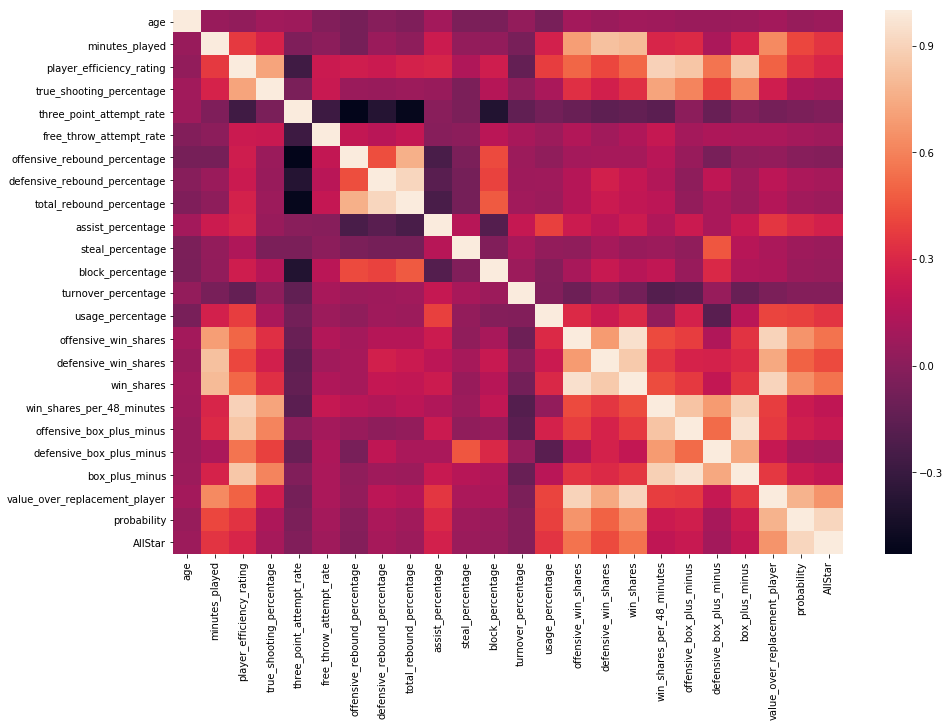

In [41]:
# A CORRELATION HEAT MAP OF STATS TO SHOW THERE RELATION TO EACHOTHER
plt.figure(figsize = (15,10))
sns.heatmap(train.corr())
plt.show

In conclution I would consider this project a success. I was able to get an accuracy of 97% which was above what I was expecting. In the future I would like to try out a number of different models as well as include more years worth of stats.

### 

### 